# Aula 11 - RNN

Na aula de hoje abordaremos um novo tipo de rede neural, as chamadas redes neurais recorrentes, ou RNNs. A aula será dividida nos seguintes tópicos:

### - Primeira parte

- Introdução e contextualização  
- A motivação da recorrência  

### - Segunda parte

- Funcionamento das RNNs

### - Terceira parte

- Exemplos com o Keras

# Introdução e contextualização

Vimos nas últimas duas aulas as primeiras redes neurais de propósito geral, as MLPs. Entendemos o seu funcionamento e os mecanismos que regem o seu funcionamento. Esses mecanismos serão válidos para todos os tipos de redes neurais que veremos pela frente.

Vimos que a MLP é uma arquitetura excelente para tarefas de predição. Contudo, há algumas condições que não são ideais para a sua aplicação. Vejamos um exemplo:

![img](https://i.imgur.com/MKk2xYw.png)

Digamos que queremos, a partir da imagem acima, prever para que direção a círculo está se movendo. Com apenas uma única "foto", não é possível prever a direção do movimento. Contudo, com uma __sequência__ de posições, a tarefa já fica um pouco mais fácil:

![img2](https://i.imgur.com/nudjK9N.png)

Na segunda imagem, conseguimos dizer com uma razoável segurança que o círculo se move para a direita.

Essa natureza de problemas que necessitam de uma sequência para serem resolvidos é muito comum: séries temporais, análise de sentimento em textos, tradução automática, entre muito outros.

As redes neurais MLP, que nós aprendemos recentemente, não são boas para lidar com esse tipo de problema por dois principais fatores: primeiro, não há uma relação de precedência entre as entradas; segundo, que entradas que para esses tipos de problemas podem ter o tamanho de entrada variável. Por conta disso, uma nova proposta de arquitetura de rede neural surge: as RNNs.



## RNNs

Para atender esse novo propósito, a arquitetura da RNN insere novos elementos que, por consequência, aumentam a complexidade do modelo. A figura abaixo representa uma RNN:


![img2.png](https://s3-sa-east-1.amazonaws.com/lcpi/c7b9a6f4-0233-49d6-a7ee-5f9f47c6741b.png)



# Usando o Keras

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

pd.options.mode.chained_assignment = None

### Entendendo a RNN do Keras

In [ ]:
model = keras.Sequential()

#                                      time_steps    num_features
model.add(layers.LSTM(1, input_shape=(3,            5), return_sequences=False))

# model.add(layers.Dense(10))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
input = np.random.rand(1, 3, 5)

print(input.shape)

input

(1, 3, 5)


array([[[0.66189506, 0.34051255, 0.6029332 , 0.0486446 , 0.73974176],
        [0.10297045, 0.31570832, 0.89367588, 0.80804694, 0.20365069],
        [0.41812345, 0.93030244, 0.32638357, 0.81884084, 0.78206221]]])

In [ ]:
model(input)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.04175529]], dtype=float32)>

## Exemplos

In [ ]:
df_temp = pd.read_csv('daily-min-temperatures.csv')

df_temp['Date'] = pd.to_datetime(df_temp['Date'])

df_temp['subset'] = 'train'

df_temp.loc[df_temp['Date'].dt.year >= 1989, 'subset'] = 'valid'

df_temp.head()

,Date,Temp,subset
0,1981-01-01,20.7,train
1,1981-01-02,17.9,train
2,1981-01-03,18.8,train
3,1981-01-04,14.6,train
4,1981-01-05,15.8,train


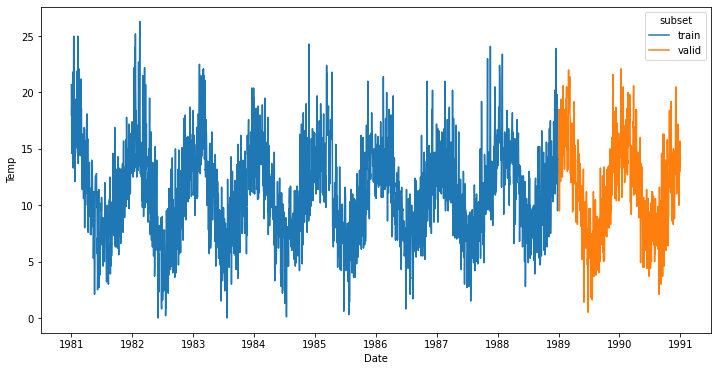

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_temp, x='Date', y='Temp', hue='subset')

In [ ]:
df_temp['up_or_down'] = df_temp['Temp'].shift(-1) - df_temp['Temp']

df_temp = df_temp.dropna()

df_temp.loc[df_temp['up_or_down'] >= 0, 'up_or_down'] = 1
df_temp.loc[df_temp['up_or_down'] < 0, 'up_or_down'] = 0

df_temp.head()

,Date,Temp,subset,up_or_down
0,1981-01-01,20.7,train,0.0
1,1981-01-02,17.9,train,1.0
2,1981-01-03,18.8,train,0.0
3,1981-01-04,14.6,train,1.0
4,1981-01-05,15.8,train,1.0


In [ ]:
df_temp['month'] = df_temp['Date'].dt.month

df_temp = pd.get_dummies(df_temp, columns=['month'])

df_temp.head()

,Date,Temp,subset,up_or_down,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1981-01-01,20.7,train,0.0,1,0,0,0,0,0,0,0,0,0,0,0
1,1981-01-02,17.9,train,1.0,1,0,0,0,0,0,0,0,0,0,0,0
2,1981-01-03,18.8,train,0.0,1,0,0,0,0,0,0,0,0,0,0,0
3,1981-01-04,14.6,train,1.0,1,0,0,0,0,0,0,0,0,0,0,0
4,1981-01-05,15.8,train,1.0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = df_temp.drop(['Date', 'subset', 'up_or_down'], axis=1).columns.to_list()
features

['Temp',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

In [ ]:
df_temp['up_or_down'].value_counts(normalize=True)

1.0    0.529734
0.0    0.470266
Name: up_or_down, dtype: float64

### Modelagem

In [ ]:
X_train = df_temp.loc[df_temp['subset'] == 'train', features]
y_train = df_temp.loc[df_temp['subset'] == 'train', 'up_or_down']

X_valid = df_temp.loc[df_temp['subset'] == 'valid', features]
y_valid = df_temp.loc[df_temp['subset'] == 'valid', 'up_or_down']


print(X_train.shape, X_valid.shape)

(2920, 13) (729, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train[['Temp']] = sc.fit_transform(X_train[['Temp']].values)

X_valid[['Temp']] = sc.transform(X_valid[['Temp']].values)

print(X_train.shape, X_valid.shape)

(2920, 13) (729, 13)


In [ ]:
def create_rnn_dataset(X, y, time_steps):
    X_rnn = []
    y_rnn = []

    if type(X) == pd.DataFrame:
        X = X.to_numpy()

    for i in range(time_steps, len(X)):
        X_rnn.append(X[i-time_steps:i])
        y_rnn.append(y.iloc[i])

    X_rnn = np.array(X_rnn)
    y_rnn = np.array(y_rnn)

    return X_rnn, y_rnn

In [ ]:
time_steps = 20

X_train_rnn, y_train_rnn = create_rnn_dataset(X_train, y_train, time_steps)

X_valid_rnn, y_valid_rnn = create_rnn_dataset(X_valid, y_valid, time_steps)

print(X_train_rnn.shape, X_valid_rnn.shape)

(2900, 20, 13) (709, 20, 13)


In [ ]:
model = keras.Sequential()

#                                              num time steps         num features
model.add(layers.SimpleRNN(32, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=False))

model.add(layers.Dense(100, activation='relu'))

model.add(layers.Dense(50, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_25 (SimpleRNN)   (None, 32)                1472      
                                                                 
 dense_31 (Dense)            (None, 100)               3300      
                                                                 
 dense_32 (Dense)            (None, 50)                5050      
                                                                 
 dense_33 (Dense)            (None, 1)                 51        
                                                                 
Total params: 9,873
Trainable params: 9,873
Non-trainable params: 0
_________________________________________________________________


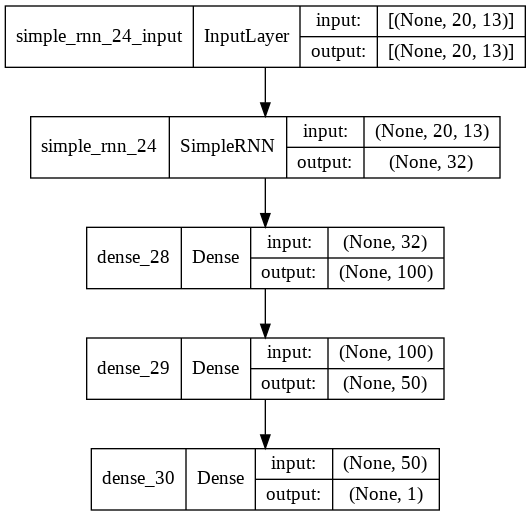

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
def get_prediction(y_predict_proba, corte=0.5):
    y_predict_proba = y_predict_proba.copy()

    mask = (y_predict_proba >= corte)
    y_predict_proba[mask] = 1
    y_predict_proba[~mask] = 0
    
    return y_predict_proba

def get_scores(y_train, y_train_pred, y_valid, y_valid_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score

    acc_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred)
    rec_train = recall_score(y_train, y_train_pred)

    acc_valid = accuracy_score(y_valid, y_valid_pred)
    prec_valid = precision_score(y_valid, y_valid_pred)
    rec_valid = recall_score(y_valid, y_valid_pred)

    print(f'Treino:\nAcc: {acc_train:.3f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
    print(f'Validação:\nAcc: {acc_valid:.3f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

In [ ]:
y_train_pred = model.predict(X_train_rnn).reshape(-1)

y_valid_pred = model.predict(X_valid_rnn).reshape(-1)

y_train_pred = get_prediction(y_train_pred)

y_valid_pred = get_prediction(y_valid_pred)

print(y_train_pred.shape, y_valid_pred.shape)

(2900,) (709,)


In [ ]:
get_scores(y_train_rnn, y_train_pred, y_valid_rnn, y_valid_pred)

Treino:
Acc: 0.499, Precision: 0.53, Recall: 0.55
Validação:
Acc: 0.495, Precision: 0.51, Recall: 0.54


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [ ]:
print("Treino do modelo")
history = model.fit(
    X_train_rnn,
    y_train_rnn,
    batch_size=100,
    epochs=3,
    validation_data=(X_valid_rnn, y_valid_rnn),
)

Treino do modelo
Epoch 1/3
29/29 [==============================] - 1s 17ms/step - loss: 0.6795 - binary_accuracy: 0.5641 - val_loss: 0.6773 - val_binary_accuracy: 0.5783
Epoch 2/3
29/29 [==============================] - 0s 8ms/step - loss: 0.6644 - binary_accuracy: 0.5962 - val_loss: 0.6664 - val_binary_accuracy: 0.5769
Epoch 3/3
29/29 [==============================] - 0s 10ms/step - loss: 0.6569 - binary_accuracy: 0.6017 - val_loss: 0.6641 - val_binary_accuracy: 0.5797


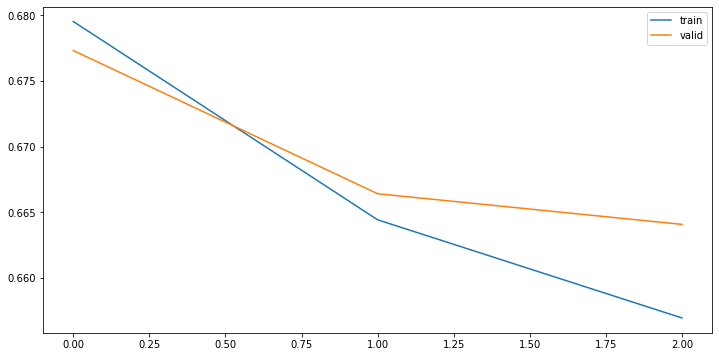

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
# plt.plot(history.history['val_binary_accuracy'], label='acc_valid')

plt.legend()

plt.show()

In [ ]:
y_train_pred = model.predict(X_train_rnn).reshape(-1)

y_valid_pred = model.predict(X_valid_rnn).reshape(-1)

CORTE = 0.5

y_train_pred = get_prediction(y_train_pred, corte=CORTE)

y_valid_pred = get_prediction(y_valid_pred, corte=CORTE)

print(y_train_pred.shape, y_valid_pred.shape)

(2900,) (709,)


In [ ]:
get_scores(y_train_rnn, y_train_pred, y_valid_rnn, y_valid_pred)

Treino:
Acc: 0.613, Precision: 0.63, Recall: 0.68
Validação:
Acc: 0.580, Precision: 0.59, Recall: 0.62


----------

# Pra anotar

- As RNNs são úteis para problemas em que a sequência das entradas importa;

- Esse tipo de arquitetura possui memória curta, tendo dificuldade em lidar com grandes sequências;

- Na maioria dos casos, vemos uma MLP conectada no final da camada recorrente.